In [2]:
%pylab inline
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv('uber-raw-data-apr14.csv')

In [4]:
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


# Clean/massage data

In [5]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date/Time  564516 non-null  datetime64[ns]
 1   Lat        564516 non-null  float64       
 2   Lon        564516 non-null  float64       
 3   Base       564516 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 17.2+ MB


In [7]:
data.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [8]:
data['day_of_month'] = data['Date/Time'].map(lambda dt: dt.day)

In [9]:
data.head()

,Date/Time,Lat,Lon,Base,day_of_month
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1


In [10]:
data['weekday'] = data['Date/Time'].map(lambda dt: dt.weekday())

In [11]:
data['hour'] = data['Date/Time'].map(lambda dt: dt.hour)

In [12]:
data.head()

,Date/Time,Lat,Lon,Base,day_of_month,weekday,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1,0


# Analyze days of the month data

Text(0.5, 1.0, 'frequency by day of month (Uber, April 2014)')

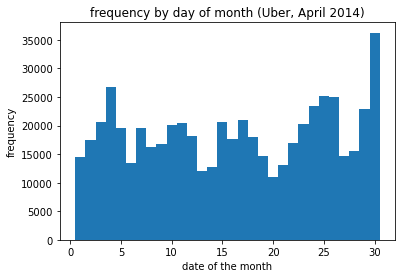

In [19]:
hist(data['day_of_month'], bins=30, range=(0.5, 30.5))
xlabel('date of the month')
ylabel('frequency')
title('frequency by day of month (Uber, April 2014)')

In [28]:
for k, rows in data.groupby('day_of_month'):
    pass
grouped_by_date = data.groupby('day_of_month').apply(lambda group: len(group))
grouped_by_date

day_of_month
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

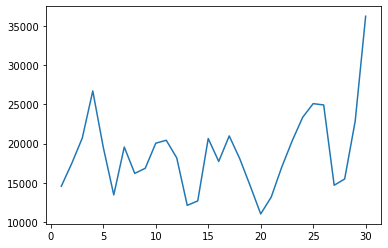

In [29]:
plot(grouped_by_date)

<BarContainer object of 30 artists>

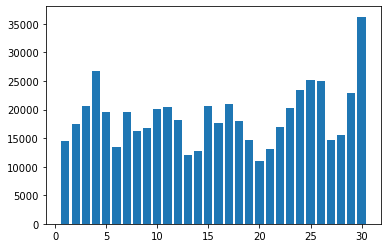

In [34]:
bar(range(1,31), grouped_by_date)

In [39]:
by_date_sorted = grouped_by_date.sort_values()
by_date_sorted

day_of_month
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

([<matplotlib.axis.YTick at 0x1ebe6a81d30>,
 [Text(0, 1, '20'),
  Text(0, 2, '13'),
  Text(0, 3, '14'),
  Text(0, 4, '21'),
  Text(0, 5, '6'),
  Text(0, 6, '1'),
  Text(0, 7, '19'),
  Text(0, 8, '27'),
  Text(0, 9, '28'),
  Text(0, 10, '8'),
  Text(0, 11, '9'),
  Text(0, 12, '22'),
  Text(0, 13, '2'),
  Text(0, 14, '16'),
  Text(0, 15, '18'),
  Text(0, 16, '12'),
  Text(0, 17, '5'),
  Text(0, 18, '7'),
  Text(0, 19, '10'),
  Text(0, 20, '23'),
  Text(0, 21, '11'),
  Text(0, 22, '15'),
  Text(0, 23, '3'),
  Text(0, 24, '17'),
  Text(0, 25, '29'),
  Text(0, 26, '24'),
  Text(0, 27, '26'),
  Text(0, 28, '25'),
  Text(0, 29, '4'),
  Text(0, 30, '30')])

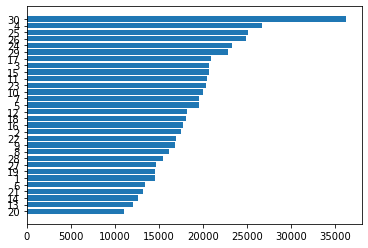

In [48]:
barh(range(1,31), by_date_sorted)
yticks(range(1,31), by_date_sorted.index)

## Analysis by hour of day

(array([11910.,  7769.,  4935.,  5040.,  6095.,  9476., 18498., 24924.,
        22843., 17939., 17865., 18774., 19425., 22603., 27190., 35324.,
        42003., 45475., 43003., 38923., 36244., 36964., 30645., 20649.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <BarContainer object of 24 artists>)

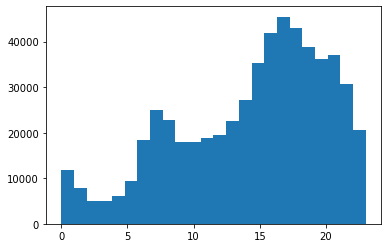

In [49]:
hist(data['hour'], bins=24)

## Analyze by weekday

([<matplotlib.axis.XTick at 0x1ebe6cc4820>,
 [Text(0, 0, 'mon'),
  Text(1, 0, 'tue'),
  Text(2, 0, 'wed'),
  Text(3, 0, 'thu'),
  Text(4, 0, 'fri'),
  Text(5, 0, 'sat'),
  Text(6, 0, 'sun')])

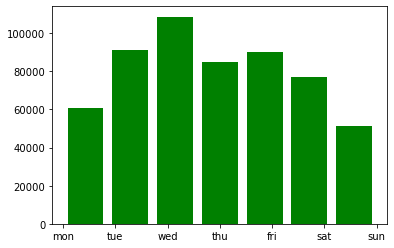

In [54]:
hist(data['weekday'], bins=7, rwidth=.8, color='green')
xticks(range(7),['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'])

# Cross analysis of hour and day of week

In [60]:
#groupby two columns
by_hour_and_weekday = data.groupby(['weekday', 'hour']).apply(lambda rows: len(rows)).unstack()
by_hour_and_weekday

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


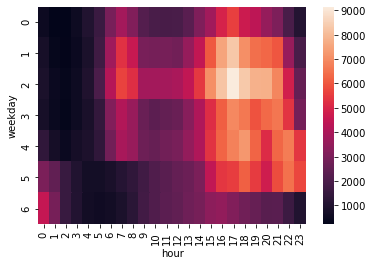

In [69]:
sns.heatmap(by_hour_and_weekday)

# Analysis by latitude and longitude

(array([4.0000e+00, 2.0000e+00, 6.0000e+00, 5.0000e+00, 5.0000e+00,
        1.0000e+00, 3.0000e+00, 2.0000e+00, 4.0000e+00, 1.0000e+01,
        7.0000e+00, 1.2000e+01, 9.0000e+00, 7.0000e+00, 2.0000e+01,
        1.0500e+02, 7.9000e+01, 1.0200e+02, 9.8000e+01, 1.7800e+02,
        2.3100e+02, 1.7200e+02, 3.2300e+02, 3.5400e+02, 4.2100e+02,
        3.7500e+02, 4.8200e+02, 5.2400e+02, 5.2530e+03, 7.0920e+03,
        8.2400e+02, 1.0590e+03, 1.5950e+03, 2.2880e+03, 3.9330e+03,
        5.3600e+03, 5.1670e+03, 7.4290e+03, 7.3860e+03, 4.7400e+03,
        7.4340e+03, 1.3992e+04, 1.5407e+04, 2.7908e+04, 4.0500e+04,
        3.4008e+04, 3.1918e+04, 3.3257e+04, 3.9590e+04, 3.1907e+04,
        3.7967e+04, 4.7042e+04, 4.4288e+04, 2.6032e+04, 2.6114e+04,
        1.6762e+04, 1.0481e+04, 6.4760e+03, 3.5860e+03, 2.1260e+03,
        1.8280e+03, 1.9020e+03, 8.7500e+02, 6.8100e+02, 6.0500e+02,
        7.3400e+02, 4.4100e+02, 3.3400e+02, 4.2700e+02, 2.9900e+02,
        5.2700e+02, 3.4300e+02, 2.7500e+02, 2.49

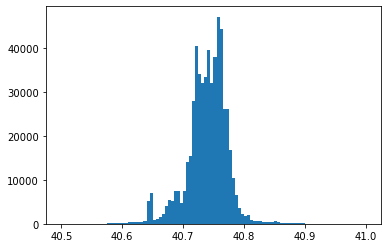

In [66]:
hist(data['Lat'], bins=100, range=(40.5, 41))

(array([1.10000e+01, 1.00000e+01, 1.90000e+01, 8.00000e+00, 1.90000e+01,
        2.20000e+01, 1.30000e+01, 1.60000e+01, 1.40000e+01, 1.60000e+01,
        1.30000e+01, 1.20000e+01, 9.00000e+00, 2.40000e+01, 4.90000e+01,
        2.40000e+01, 1.90000e+01, 3.20000e+01, 1.60000e+01, 3.20000e+01,
        2.20000e+01, 2.50000e+01, 3.40000e+01, 3.20000e+01, 5.10000e+01,
        4.60000e+01, 3.30000e+01, 4.10000e+01, 7.50000e+01, 4.10000e+01,
        9.30000e+01, 1.11100e+03, 2.34600e+03, 2.19000e+02, 8.70000e+01,
        5.00000e+01, 3.40000e+01, 4.10000e+01, 4.20000e+01, 7.90000e+01,
        8.30000e+01, 8.70000e+01, 1.98000e+02, 2.59000e+02, 2.12000e+02,
        1.11600e+03, 2.74300e+03, 1.70200e+03, 1.81640e+04, 9.19220e+04,
        1.00779e+05, 1.12824e+05, 8.80630e+04, 4.39680e+04, 3.64650e+04,
        1.55170e+04, 5.92800e+03, 4.51200e+03, 2.78700e+03, 1.61100e+03,
        9.68000e+02, 2.08600e+03, 4.65500e+03, 5.80300e+03, 6.07000e+02,
        7.61000e+02, 5.37000e+02, 4.01000e+02, 3.64

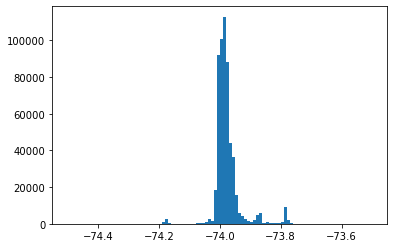

In [68]:
hist(data['Lon'], bins=100, range=(-74.5, -73.5))

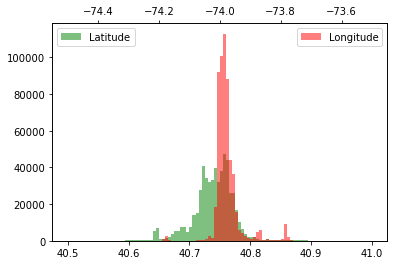

In [76]:
hist(data['Lat'], bins=100, range=(40.5, 41), color='g', alpha=0.5, label='Latitude')
legend(loc='upper left')
twiny()
hist(data['Lon'], bins=100, range=(-74.5, -73.5), color='r', alpha=0.5, label='Longitude')
legend()

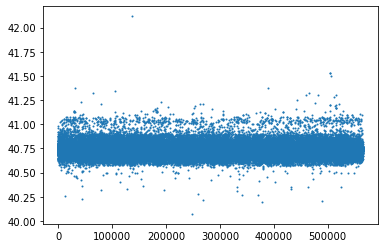

In [84]:
plot(data['Lat'], '.', ms=2)

(40.5, 41.0)

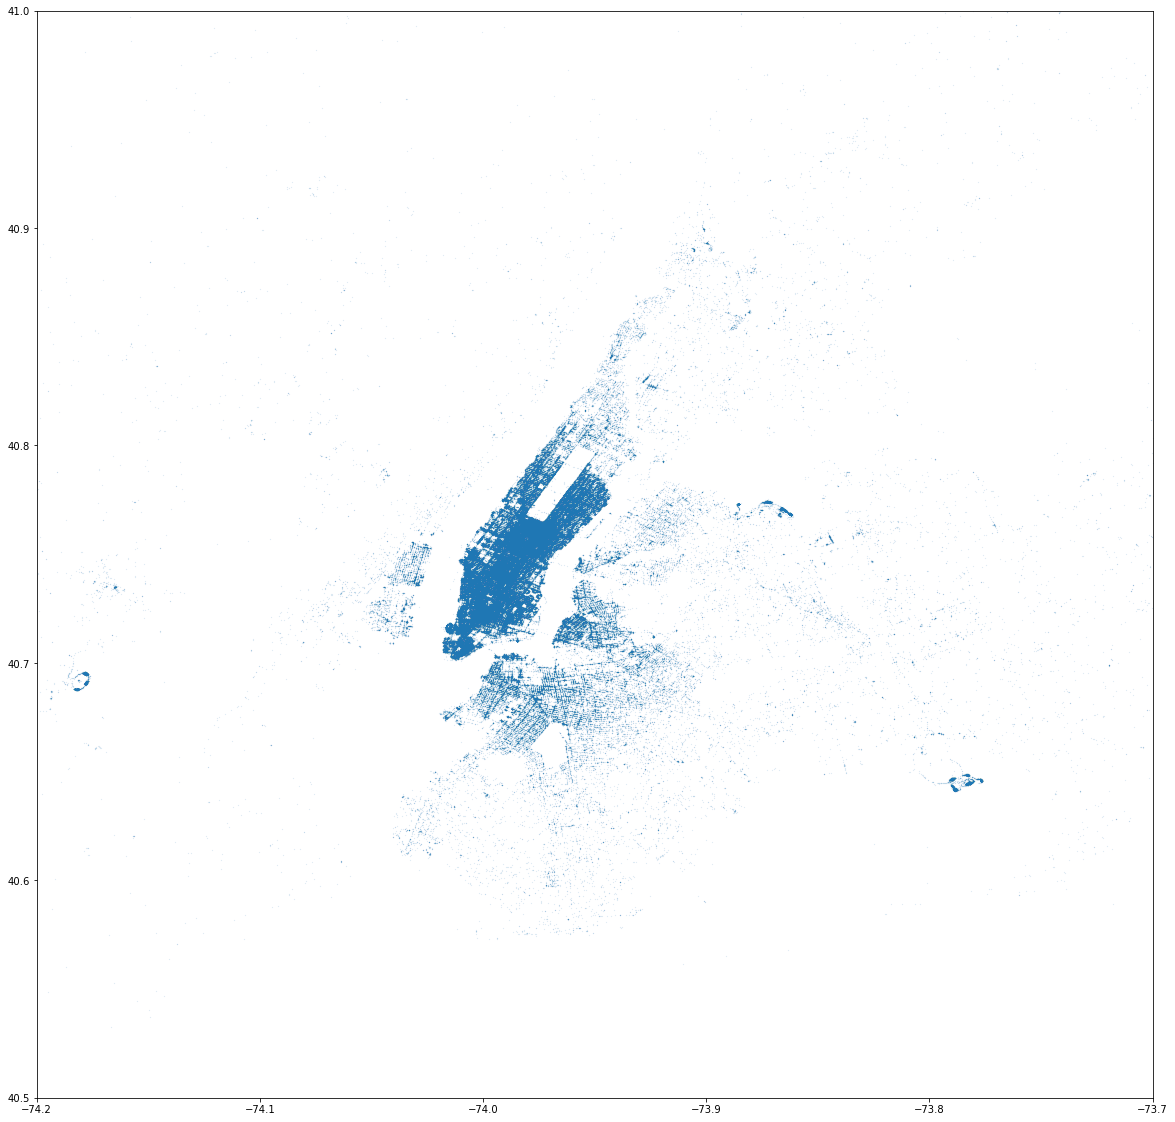

In [97]:
figure(figsize=(20,20))
plot(data['Lon'], data['Lat'], '.', ms=0.1)
xlim(-74.2, -73.7)
ylim(40.5, 41)
#We can see the streets of Manhattan from the latitude/longitude data